# Health Insurance Premium Prediction

In [2]:
# Bu komutları çalıştırın
!pip install tf_keras tensorflow

import os
# BU ÇOK ÖNEMLİ: Keras 3 yerine eski Keras 2'yi aktif ediyoruz
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import tensorflow as tf
import tf_keras

print("TensorFlow Version:", tf.__version__)
# Çıktıda 'keras' versiyonunun tensorflow içinde gömülü olduğunu teyit ederiz.

TensorFlow Version: 2.20.0


In [3]:
%%html
<img src="https://insurance-blog-cms.paytminsurance.co.in/258_Health_Insurance_7_Foolproof_Ways_To_Save_On_Health_Insurance_Premium_2_72868923ca.jpg">


# Proje Hakkında

Bu proje, sağlık sigortası prim tutarlarını makine öğrenmesi yöntemleri kullanarak tahmin etmeyi amaçlamaktadır.

**Hedef Değer (Target):** charges (sigorta primi)

**Amaçlar:**
- Veriyi keşfetmek ve temizlemek
- Özellik mühendisliği uygulamak
- Regresyon modeli eğitmek
- Model performansını değerlendirmek

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Inspection

In [5]:
print(df.shape)
print(df.info())
print(df.describe())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.

## EDA

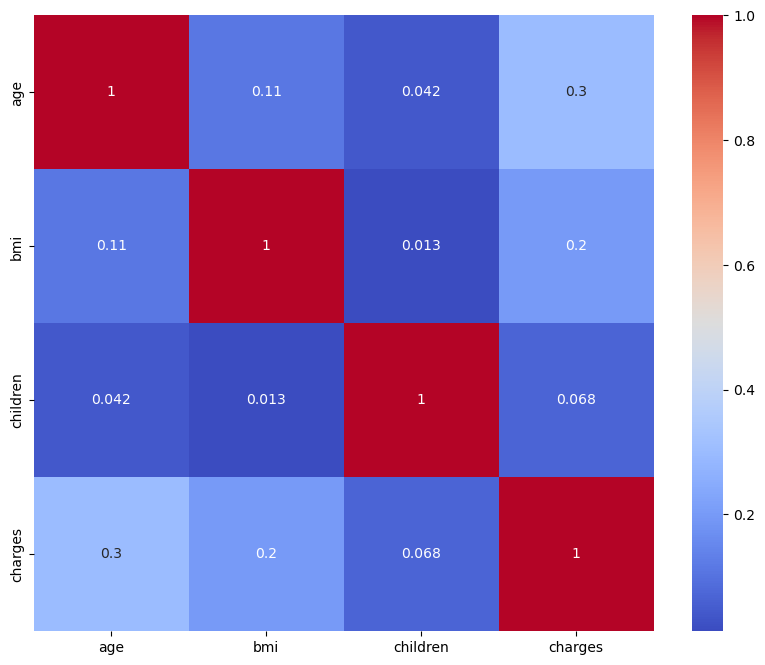

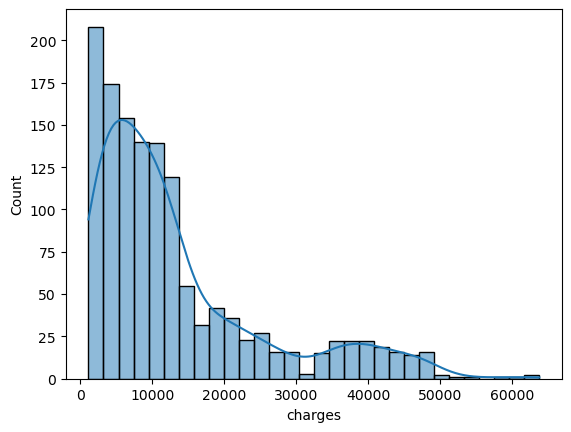

In [6]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of Charges
sns.histplot(df['charges'], kde=True)
plt.show()

## Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('charges', axis=1)
y = df['charges']

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Machine Learning

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f'Random Forest R2 Score: {r2_score(y_test, y_pred_rf):.4f}')
print(f'Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}')

# Save Model
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

Random Forest R2 Score: 0.8656
Random Forest RMSE: 4567.9561


['preprocessor.pkl']

## Deep Learning

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

y_pred_dl = model.predict(X_test).flatten()
print(f'Deep Learning R2 Score: {r2_score(y_test, y_pred_dl):.4f}')
model.save('dl_model.h5')




9/9 [==============================] - 0s 2ms/step
Deep Learning R2 Score: 0.8562


C:\Users\Erhan\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

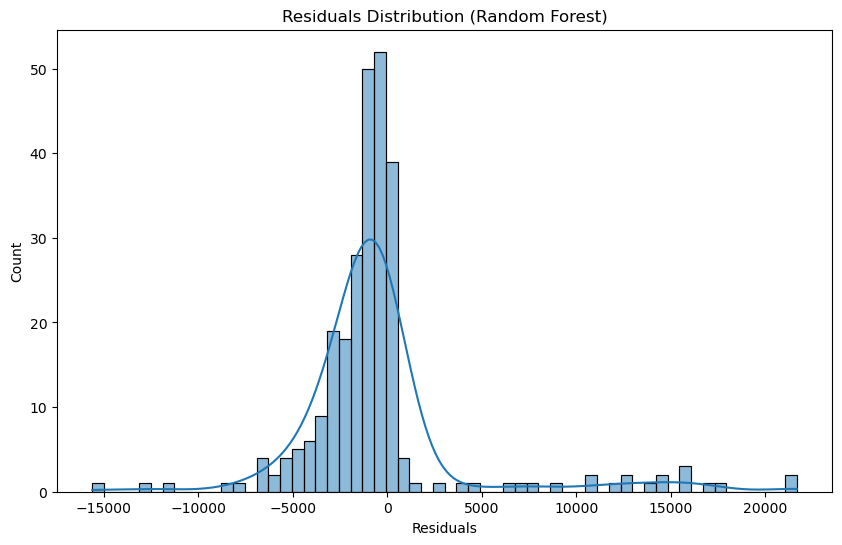

In [10]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.show()